Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

games_df = pd.read_csv('games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparar los datos

In [48]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas)
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [49]:
# Convierte los datos en los tipos necesarios.
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce').astype('Int64')
for col in ['platform', 'genre', 'rating']:
    games_df[col] = games_df[col].astype('category')
games_df.dtypes


name                 object
platform           category
year_of_release       Int64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score           object
rating             category
dtype: object

### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Se cambio el tipo de year of release a Int64 porque los años los tomaremos como números enteros.

na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score  de object a float64.
Se cambió porque manejan números decimales y poder hacer un análisis má estadístico.

platform, genre, rating de object a category.
Se cambió porque son columnas que tienen valores en números como en string

In [50]:
# Reemplaza 'tbd' con NaN y convierte a numérico
games_df['user_score'] = games_df['user_score'].replace('tbd', pd.NA)
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df.dtypes

name                 object
platform           category
year_of_release       Int64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object

### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

En year_of_release no se rellenó porque inventar un año afectaría el analisis.

En critic_score y user_score no se rellenó porque una puntuación faltante no puede ser asumida como 0 ni promedio

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Porque puede faltar datos incompletos o no registrados como  juegos menos conocidos, lanzamientos locales o prototipos que no tienen fecha pública.

También se debe a la falta de actualización de los datos.



### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Se deben convertir todos los tbd en valores ausentes (NaN), para que Pandas lo trate correctamente como dato faltante.

Así podemos hacer calcular promedios sin errores 

In [51]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].fillna(0).sum(axis=1)
print(games_df[['name','total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


# Paso 3. Analiza los datos

In [52]:
# Cuántos juegos fueron lanzados en diferentes años.
release_counts = games_df['year_of_release'].value_counts().sort_index()
print(release_counts)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


¿Son significativos los datos de cada período?

Claro que si porque cada año se van vendiendo más juegos lo podemos ver desde los primeros años hasta los últimos años como desde el 2002 tuvo un crecimiento exponencial.

### Observa cómo varían las ventas de una plataforma a otra. 

In [53]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/1525730601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


In [54]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
popular_platforms = platform_sales[platform_sales > 0].index
print("Plataformas populares:", popular_platforms)

Plataformas populares: CategoricalIndex(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP',
                  'PC', '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
                  '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
                  'TG16', '3DO', 'GG', 'PCFX'],
                 categories=['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne'], ordered=False, dtype='category', name='platform')


In [55]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
platform_lifecycle = (
    games_df.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
    .dropna()
    .astype(int)
)
platform_lifecycle['lifespan'] = platform_lifecycle['max'] - platform_lifecycle['min']
print(platform_lifecycle.sort_values('lifespan', ascending=False).head(10))

           min   max  lifespan
platform                      
PC        1985  2016        31
DS        1985  2013        28
GB        1988  2001        13
X360      2005  2016        11
PSP       2004  2015        11
PS2       2000  2011        11
NES       1983  1994        11
DC        1998  2008        10
Wii       2006  2016        10
PS3       2006  2016        10


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/1094894780.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_df.groupby('platform')['year_of_release']


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Hay plataformas desaparecidas antes del 2012 como PS2, GB, NES, DC.

Empezaron en los años 80s y 90 y son consolas muy antiguas.

Los que realmente nos importan son las consolas a partir del año 2012 como PS3, X360 y el Wii

In [56]:
# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
model_data = games_df[
    (games_df['year_of_release'] >= 2012) &
    (games_df['year_of_release'] <= 2016)
]

print(model_data[['name', 'platform', 'year_of_release', 'total_sales']].head())

                          name platform  year_of_release  total_sales
16          Grand Theft Auto V      PS3             2013        21.05
23          Grand Theft Auto V     X360             2013        16.27
31   Call of Duty: Black Ops 3      PS4             2015        14.63
33         Pokemon X/Pokemon Y      3DS             2013        14.60
34  Call of Duty: Black Ops II      PS3             2012        13.79


In [57]:
# ¿Qué plataformas son líderes en ventas?
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Plataformas líderes en ventas:")
print(platform_sales.head(10))

Plataformas líderes en ventas:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/3689764750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


In [58]:
# ¿Cuáles crecen y cuáles se reducen?
# Agrupar por año y plataforma
yearly_sales = (
    games_df
    .dropna(subset=['year_of_release'])
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack(fill_value=0)
)
# Calcular diferencia entre 2016 y 2012 (últimos 5 años antes de 2017)
growth = yearly_sales.loc[2016] - yearly_sales.loc[2012]
growth = growth.sort_values(ascending=False)
print(growth)

platform
PS4      69.25
XOne     26.15
NG        0.00
XB        0.00
WS        0.00
TG16      0.00
SNES      0.00
SCD       0.00
SAT       0.00
PS2       0.00
3DO       0.00
PCFX      0.00
2600      0.00
GBA       0.00
GC        0.00
DC        0.00
GB        0.00
NES       0.00
PS        0.00
GEN       0.00
GG        0.00
N64       0.00
PSP      -7.69
DS      -11.01
PSV     -11.94
WiiU    -12.96
PC      -17.97
Wii     -21.53
3DS     -36.22
X360    -98.22
PS3    -103.76
dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/3743814208.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year_of_release', 'platform'])['total_sales']


Las plataformas que crecen en ventas son el PS4 con más de 69.25 millones, de ahí le sigue Xbox One con más de 26.15 millones.

Plataformas que se reducen son PS3, Xbox 360, 3DS, DS, PSP. Estas plataformas están en declive o saliendo del mercado

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


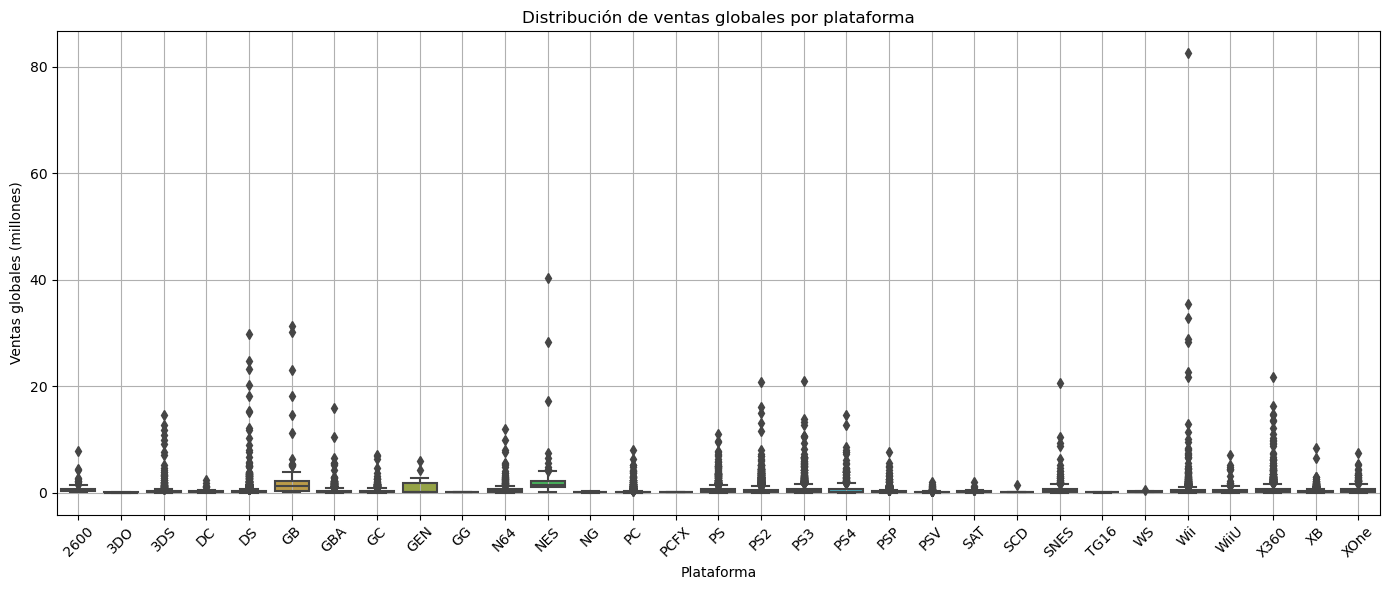

In [59]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
filtered_df = games_df[games_df['total_sales'] > 0]
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### ¿Son significativas las diferencias en las ventas?

Sí, definitivamente:

Algunas plataformas tienen mucho más potencial comercial que otras.

La mayoría de los juegos no venden mucho, pero algunas plataformas tienen muchos más juegos exitosos.

In [60]:
# ¿Qué sucede con las ventas promedio en varias plataformas? 
avg_sales = games_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:")
avg_sales.head(10)

Ventas promedio por plataforma:


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/2667823279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = games_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)


platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
Name: total_sales, dtype: float64

GB y NES lideran en promedio, pero con pocos juegos y muchos clásicos.

PS4 y X360 tienen buen rendimiento promedio con un catálogo amplio y son de las plataformas más actuales.

PS3, Wii, N64 también tienen promedios aceptables, pero ya no son plataformas activas.



### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección)

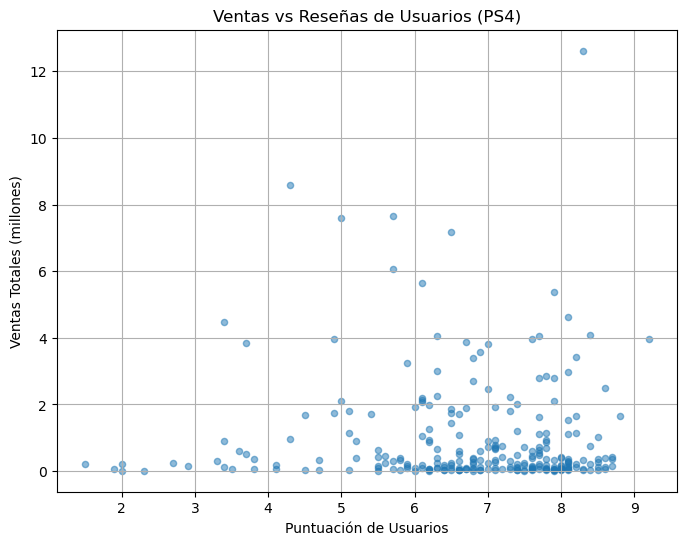

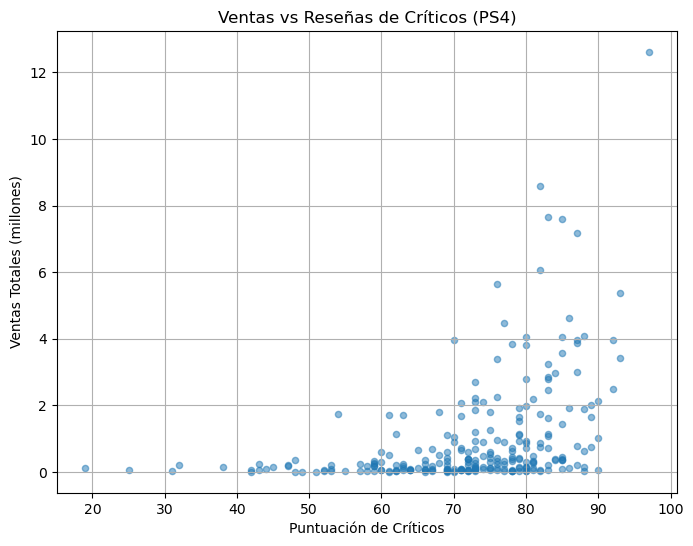

Correlación entre reseñas de usuarios y ventas: -0.03
Correlación entre reseñas de críticos y ventas: 0.41


In [61]:
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
# Vamos a elegir PS4
ps4_df = games_df[games_df['platform'] == 'PS4'].dropna(subset=['user_score', 'critic_score', 'total_sales'])
# Creamos un gráfico de dispersión
ps4_df.plot(x='user_score', y='total_sales',kind='scatter', alpha=0.5, title='Ventas vs Reseñas de Usuarios (PS4)', figsize=(8,6,))
xlabel = 'Puntuación de Usuarios'
ylabel = 'Ventas Totales (millones)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.show()

ps4_df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, title='Ventas vs Reseñas de Críticos (PS4)', figsize=(8,6,))
xlabel = 'Puntuación de Críticos'
ylabel = 'Ventas Totales (millones)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.show()
# Vamos a calcular la correlación
user_corr = ps4_df['user_score'].corr(ps4_df['total_sales'])
critic_corr = ps4_df['critic_score'].corr(ps4_df['total_sales'])
print(f"Correlación entre reseñas de usuarios y ventas: {user_corr:.2f}")
print(f"Correlación entre reseñas de críticos y ventas: {critic_corr:.2f}")

# Conclusiones

users_score en comparación con las ventas es practicamente nula lo cual no está relacionada con el número de ventas.

critic_score en comparación con las ventas es moderadamente positiva, cuando las críticas de las reseñas son positivos las ventes tienden a subir.

In [62]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
multiplatform_games = games_df[games_df['name'].duplicated(keep=False)]
comparison = (
    multiplatform_games
    .groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
    .sort_values(['name', 'total_sales'], ascending=[True,False])
)
print(comparison.head(10))

                    name platform  total_sales
2   Frozen: Olaf's Quest      3DS         0.59
4   Frozen: Olaf's Quest       DS         0.51
0   Frozen: Olaf's Quest     2600         0.00
1   Frozen: Olaf's Quest      3DO         0.00
3   Frozen: Olaf's Quest       DC         0.00
5   Frozen: Olaf's Quest       GB         0.00
6   Frozen: Olaf's Quest      GBA         0.00
7   Frozen: Olaf's Quest       GC         0.00
8   Frozen: Olaf's Quest      GEN         0.00
9   Frozen: Olaf's Quest       GG         0.00


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/2343423342.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['name', 'platform'])['total_sales']


### Echa un vistazo a la distribución general de los juegos por género.

In [63]:
# ¿Qué se puede decir de los géneros más rentables? 
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género:")
print(genre_sales)

Ventas totales por género:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/718471294.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los generos más rentables son Action, Sports, Shooter, RPG, altas ventas probable muchas franquicias exitosas y están en diferentes plataformas.

Los generos menos rentables son Puzzle, Strategy, Adventure, Simulation, tienen menos presencia en consolas y están dirigidos a un nicho de mercado muy chico.


# Paso 4. Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [64]:
region_sales = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# Calculamos las plataformas más populares en cada región
top_na = region_sales['na_sales'].sort_values(ascending=False).head(5)
top_eu = region_sales['eu_sales'].sort_values(ascending=False).head(5)
top_jp = region_sales['jp_sales'].sort_values(ascending=False).head(5)
print("Plataformas más populares en NA:")
print(top_na)
print("Plataformas más populares en EU:")
print(top_eu)
print("Plataformas más populares en JP:")
print(top_jp)

Plataformas más populares en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Plataformas más populares en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Plataformas más populares en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/3091948336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()


In [65]:
# Cuales son los cinco generos más populares en cada región
genre_region_sales = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_eu = genre_region_sales['eu_sales'].sort_values(ascending=False).head(5)
top_na = genre_region_sales['na_sales'].sort_values(ascending=False).head(5)
top_jp = genre_region_sales['jp_sales'].sort_values(ascending=False).head(5)
print("Géneros más populares en NA:")
print(top_na)
print("Géneros más populares en EU:")
print(top_eu)
print("Géneros más populares en JP:")
print(top_jp)

Géneros más populares en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Géneros más populares en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Géneros más populares en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/1051100052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_region_sales = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()


Tanto NA como en EU prefieren géneros de acción, deportes, shooters como los de guerra.

Lo que es JP si hay diferencias en los géneros, les gusta más el Role-Playing, también tienen fuerte presencia en los géneros de casuales o de simulación, los de deposrtes o shooters no son tan aficionados.

In [66]:
# Las clasificaciones de ESRB afectan a las ventas en regiones individuales.
# Vamos a analizar la relación entre las clasificaciones de ESRB y las ventas en cada región.
esrb_sales = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("Ventas por clasificación ESRB:")
print(esrb_sales)

Ventas por clasificación ESRB:
        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/1060360881.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_sales = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()


En NA la clasificación E (Everyone) domina claramente. T (Teen) y M (Mature) tienen ventas muy similares. Clasificaciones AO, EC, K-A, RP son insignificantes están entre los >=2 millones.

En EU es similar a NA pero con menos peso en M y en E. E también lidera, seguido de T y M.

En JP Clasificación E domina, pero con menor volumen total que en NA y EU. T ocupa el segundo lugar y K-A es más relevante aquí que en otras regiones.

### Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [67]:
# Calcula las calificaciones promedio por usuarios para las plataformas Xbox One y PC
avg_user_score = games_df.groupby('platform')['user_score'].mean().dropna().sort_values(ascending=False)
print(avg_user_score.loc[['XOne', 'PC']])

platform
XOne    6.521429
PC      7.062468
Name: user_score, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/3568623197.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_user_score = games_df.groupby('platform')['user_score'].mean().dropna().sort_values(ascending=False)


PC tiene una una calificación promedio más alta.

PC (7.06) supera a Xbox One (6.52) por más de 0.5 puntos, lo cual es una diferencia significativa en escalas de 0 a 10.

Esto se debe a que PC pueda tener más juegos valorados positivamente.

En conclusión no tienen calificaciones promedio iguales por lo cual los usuarios califican mejor los juegos de PC.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [68]:
# Calcula las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.
avg_genre_score = games_df.groupby('genre')['user_score'].mean().dropna().sort_values(ascending=False)
print(avg_genre_score.loc[['Action', 'Sports']])

genre
Action    7.054044
Sports    6.961197
Name: user_score, dtype: float64


/var/folders/jq/2h871vkx781b1md5jy5p7s940000gn/T/ipykernel_3007/358398775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_genre_score = games_df.groupby('genre')['user_score'].mean().dropna().sort_values(ascending=False)


Acción tiene una calificación ligeramente más alta.

En conclusiión las calificaciones promedio son iguales si utilizamos un alpha de 0.05. Los usuarios tienden a irse por los dos géneros.

### Cómo formulaste las hipótesis nula y alternativa.

### Qué criterio utilizaste para probar las hipótesis y por qué.

In [69]:
# Filtrar las calificaciones por plataforma
xone_scores = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games_df[games_df['platform'] == 'PC']['user_score'].dropna()
alpha = 0.05
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")

valor p: 4.935072360183576e-06
Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


In [70]:
# Filtramos las puntuaciones de usuario por género
action_scores = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
sports_scores = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()
alpha = 0.05
results = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

valor p: 0.11483818791498293
No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


Comparamos el valor p con alpha = 0.05:

Si p < 0.05  Rechazamos Hipotesis. Hay evidencia de que las medias son diferentes.

Si p ≥ 0.05  No podemos rechazar Hipotesis. No hay evidencia suficiente para decir que son diferentes.

Usamos una prueba t de dos muestras independientes con un nivel de significancia del 5%, porque comparamos promedios de dos grupos no relacionados y no podemos asumir varianzas iguales.

# Paso 6. Escribe una conclusión general

En conclusión general este proyecto tuvo como objetivo analizar un conjunto de datos sobre videojuegos publicados en múltiples plataformas, para comprender mejor los factores que influyen en sus ventas, identificar tendencias del mercado y evaluar la influencia de variables como género, plataforma, región y calificaciones.

Todos los datos los fuimos creando mediante lo pedia el proyecto.

En primer lugar fueron las tendencias generales de las ventas. Las plataformas más exitosas en términos de ventas totales históricas fueron PS2, X360, PS3 y Wii.

Nuevas plataformas como PS4 mostraron crecimiento en los últimos años del dataset, mientras que otras como X360 y PS3 se encontraban en declive.

Análisis por plataforma. 

PS4, XOne y 3DS dominaron las ventas en el período más reciente.

Algunas plataformas, como PC, mostraron calificaciones de usuarios altas, aunque con un volumen de ventas moderado.

Preferencias por región.

Norteamérica favorece juegos de acción, deportes y shooters, con preferencia por plataformas de Microsoft y Sony.

Europa tiene una distribución similar a NA, pero con aún mayor fuerza de PlayStation y juegos deportivos.

Japón es un mercado único, dominado por RPGs, plataformas y consolas portátiles como 3DS y PSP. Las plataformas occidentales como Xbox tienen muy baja participación aquí.

Calificaciones (ESRB).

Los juegos con clasificación E (Everyone) lideran las ventas globales.

Los juegos Mature (M) se venden bien en NA y EU, pero tienen baja aceptación en Japón.

Influencia de las reseñas.

Las reseñas de críticos tienen una correlación moderadamente positiva con las ventas (0.41), lo que sugiere que influyen en el comportamiento de compra.

Comparaciones específicas.

Las calificaciones promedio de usuarios fueron significativamente más altas en PC que en Xbox One, según el análisis estadístico realizado (prueba t).

Se encontraron diferencias de calificación también entre géneros: los juegos de acción fueron ligeramente mejor valorados que los de deportes.